In [ ]:
pip install keras scikit-learn


In [ ]:
pip install tensorflow


In [ ]:
pip install scikeras[tensorflow]


In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Libraries for Deep Learning Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier  # SciKeras instead of TensorFlow wrapper
from tensorflow.keras.optimizers import SGD

# Example of a Keras model wrapped for scikit-learn using SciKeras
def create_model():
    # Create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
    return model

# Use the KerasClassifier from SciKeras
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)

# Example data (replace with your actual dataset)
# Load a dataset for binary classification (e.g., a CSV file)
# data = pd.read_csv('your_dataset.csv')
# X = data.iloc[:, :-1]  # Features
# Y = data.iloc[:, -1]   # Target

# Example train/test split (replace with your actual dataset)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# Use this to fit the model on your dataset
# model.fit(X_train, Y_train)

# Evaluate the model (replace with your actual evaluation logic)
# predictions = model.predict(X_test)
# print(accuracy_score(Y_test, predictions))
# print(confusion_matrix(Y_test, predictions))
# print(classification_report(Y_test, predictions))

# To grid search and tune hyperparameters:
# param_grid = {'batch_size': [10, 20, 40], 'epochs': [50, 100, 150]}
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, Y_train)
# print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")

print("Path to dataset files:", path)



100%|██████████| 89.0M/89.0M [00:00<00:00, 150MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mczielinski/bitcoin-historical-data/versions/49


In [ ]:
# load dataset
dataset = pd.read_csv('/content/btcusd_1-min_data.csv')


In [ ]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# shape
dataset.shape

(6702281, 6)

In [ ]:
# peek at data
set_option('display.width', 100)
dataset.tail(5)

,Timestamp,Open,High,Low,Close,Volume
6702276,1.729641e+09,67334.0,67353.0,67334.0,67353.0,0.075639
6702277,1.729641e+09,67358.0,67365.0,67358.0,67365.0,0.009607
6702278,1.729642e+09,67374.0,67382.0,67374.0,67382.0,0.008339
6702279,1.729642e+09,67382.0,67409.0,67373.0,67373.0,9.351732
6702280,NaN,57854.0,57864.0,57835.0,57835.0,1.353466


In [ ]:
# describe data
pd.set_option('display.precision', 3)  # Definir a precisão para exibição
dataset.describe()

,Timestamp,Open,High,Low,Close,Volume
count,6.702e+06,6.702e+06,6.702e+06,6.702e+06,6.702e+06,6.702e+06
mean,1.527e+09,1.417e+04,1.417e+04,1.416e+04,1.417e+04,5.482e+00
std,1.161e+08,1.896e+04,1.897e+04,1.896e+04,1.897e+04,2.300e+01
min,1.325e+09,3.800e+00,3.800e+00,3.800e+00,3.800e+00,0.000e+00
25%,1.426e+09,4.106e+02,4.108e+02,4.105e+02,4.106e+02,1.811e-02
50%,1.527e+09,6.188e+03,6.190e+03,6.184e+03,6.188e+03,5.000e-01
75%,1.627e+09,2.283e+04,2.284e+04,2.282e+04,2.283e+04,3.193e+00
max,1.730e+09,7.379e+04,7.379e+04,7.374e+04,7.379e+04,5.854e+03


In [ ]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = True


In [ ]:
dataset[dataset.columns.values] = dataset[dataset.columns.values].ffill()

In [ ]:
dataset=dataset.drop(columns=['Timestamp'])

In [ ]:
# Initialize the `signals` DataFrame with the `signal` column
#datas['PriceMove'] = 0.0

# Create short simple moving average over the short window
dataset['short_mavg'] = dataset['Close'].rolling(window=10, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
dataset['long_mavg'] = dataset['Close'].rolling(window=60, min_periods=1, center=False).mean()

# Create signals
dataset['signal'] = np.where(dataset['short_mavg'] > dataset['long_mavg'], 1.0, 0.0)

In [ ]:
dataset.tail()

,Open,High,Low,Close,Volume,short_mavg,long_mavg,signal
6702276,67334.0,67353.0,67334.0,67353.0,0.076,67334.3,67508.333,0.0
6702277,67358.0,67365.0,67358.0,67365.0,0.010,67338.8,67502.100,0.0
6702278,67374.0,67382.0,67374.0,67382.0,0.008,67348.1,67496.500,0.0
6702279,67382.0,67409.0,67373.0,67373.0,9.352,67350.7,67490.783,0.0
6702280,57854.0,57864.0,57835.0,57835.0,1.353,66401.0,67325.883,0.0


4.3. Engenharia de Atributos
Começamos construindo um conjunto de dados que contém os preditores que serão usados para realizar as previsões e a variável de saída.
Os dados atuais do Bitcoin consistem em data, abertura (open), alta (high), baixa (low), fechamento (close) e volume. Usando esses dados, calculamos os seguintes indicadores técnicos:

* Média Móvel (Moving Average): Indica a tendência do movimento de preços ao reduzir o "ruído" em um gráfico de preços.
* Oscilador Estocástico %K e %D: Um indicador de momento que compara o preço de fechamento de um ativo a uma faixa de preços em um determinado período. %K e %D são indicadores lentos e rápidos.
* Índice de Força Relativa (RSI): Um indicador de momento que mede a magnitude das recentes mudanças de preços para avaliar condições de sobrecompra ou sobrevenda.
* Taxa de Variação (ROC): Um oscilador de momento que mede a variação percentual entre o preço atual e o preço de um determinado número de períodos passados.
* Momentum (MOM): Refere-se à taxa de aceleração do preço ou volume de um ativo – ou seja, a velocidade com que o preço está mudando.

In [ ]:
#calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA
dataset['EMA10'] = EMA(dataset, 10)
dataset['EMA30'] = EMA(dataset, 30)
dataset['EMA200'] = EMA(dataset, 200)
dataset.head()

#calculation of rate of change
def ROC(df, n):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))
    return ROC
dataset['ROC10'] = ROC(dataset['Close'], 10)
dataset['ROC30'] = ROC(dataset['Close'], 30)

#Calculation of price momentum
def MOM(df, n):
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))
    return MOM
dataset['MOM10'] = MOM(dataset['Close'], 10)
dataset['MOM30'] = MOM(dataset['Close'], 30)

#calculation of relative strength index
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 rs = u.ewm(com=period-1, adjust=False).mean() / \
 d.ewm(com=period-1, adjust=False).mean()
 return 100 - 100 / (1 + rs)
dataset['RSI10'] = RSI(dataset['Close'], 10)
dataset['RSI30'] = RSI(dataset['Close'], 30)
dataset['RSI200'] = RSI(dataset['Close'], 200)

#calculation of stochastic osillator.

def STOK(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

dataset['%K10'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%D10'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%K30'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%D30'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%K200'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 200)
dataset['%D200'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 200)

In [ ]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
dataset['MA21'] = MA(dataset, 10)
dataset['MA63'] = MA(dataset, 30)
dataset['MA252'] = MA(dataset, 200)
dataset.tail()

,Open,High,Low,Close,Volume,short_mavg,long_mavg,signal,EMA10,EMA30,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
6702276,67334.0,67353.0,67334.0,67353.0,0.076,67334.3,67508.333,0.0,67347.591,67404.020,...,48.630,94.444,82.343,36.538,34.615,18.061,17.110,67334.3,67407.767,67514.640
6702277,67358.0,67365.0,67358.0,67365.0,0.010,67338.8,67502.100,0.0,67350.756,67401.502,...,48.796,100.000,94.108,41.154,37.051,20.342,18.314,67338.8,67402.667,67514.330
6702278,67374.0,67382.0,67374.0,67382.0,0.008,67348.1,67496.500,0.0,67356.437,67400.244,...,49.030,100.000,98.148,47.876,41.856,23.574,20.659,67348.1,67398.133,67514.105
6702279,67382.0,67409.0,67373.0,67373.0,9.352,67350.7,67490.783,0.0,67359.448,67398.486,...,48.911,55.000,85.000,45.817,44.949,21.863,21.926,67350.7,67393.600,67513.925
6702280,57854.0,57864.0,57835.0,57835.0,1.353,66401.0,67325.883,0.0,65627.731,66781.487,...,13.647,0.000,51.667,0.000,31.231,0.000,15.146,66401.0,67071.433,67465.850


In [ ]:
dataset.tail()

,Open,High,Low,Close,Volume,short_mavg,long_mavg,signal,EMA10,EMA30,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
6702276,67334.0,67353.0,67334.0,67353.0,0.076,67334.3,67508.333,0.0,67347.591,67404.020,...,48.630,94.444,82.343,36.538,34.615,18.061,17.110,67334.3,67407.767,67514.640
6702277,67358.0,67365.0,67358.0,67365.0,0.010,67338.8,67502.100,0.0,67350.756,67401.502,...,48.796,100.000,94.108,41.154,37.051,20.342,18.314,67338.8,67402.667,67514.330
6702278,67374.0,67382.0,67374.0,67382.0,0.008,67348.1,67496.500,0.0,67356.437,67400.244,...,49.030,100.000,98.148,47.876,41.856,23.574,20.659,67348.1,67398.133,67514.105
6702279,67382.0,67409.0,67373.0,67373.0,9.352,67350.7,67490.783,0.0,67359.448,67398.486,...,48.911,55.000,85.000,45.817,44.949,21.863,21.926,67350.7,67393.600,67513.925
6702280,57854.0,57864.0,57835.0,57835.0,1.353,66401.0,67325.883,0.0,65627.731,66781.487,...,13.647,0.000,51.667,0.000,31.231,0.000,15.146,66401.0,67071.433,67465.850


In [ ]:
#excluding columns that are not needed for our prediction.

dataset=dataset.drop(['High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)

In [ ]:
dataset = dataset.dropna(axis=0)

In [ ]:
dataset.tail()

,Close,signal,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,...,RSI200,%K10,%D10,%K30,%D30,%K200,%D200,MA21,MA63,MA252
6702276,67353.0,0.0,67347.591,67404.020,67502.018,0.049,-0.244,70.0,-165.0,43.693,...,48.630,94.444,82.343,36.538,34.615,18.061,17.110,67334.3,67407.767,67514.640
6702277,67365.0,0.0,67350.756,67401.502,67500.654,0.113,-0.227,45.0,-153.0,48.153,...,48.796,100.000,94.108,41.154,37.051,20.342,18.314,67338.8,67402.667,67514.330
6702278,67382.0,0.0,67356.437,67400.244,67499.474,0.052,-0.188,93.0,-136.0,53.901,...,49.030,100.000,98.148,47.876,41.856,23.574,20.659,67348.1,67398.133,67514.105
6702279,67373.0,0.0,67359.448,67398.486,67498.215,0.061,-0.188,26.0,-136.0,50.601,...,48.911,55.000,85.000,45.817,44.949,21.863,21.926,67350.7,67393.600,67513.925
6702280,57835.0,0.0,65627.731,66781.487,67402.064,-14.101,-14.287,-9497.0,-9665.0,0.692,...,13.647,0.000,51.667,0.000,31.231,0.000,15.146,66401.0,67071.433,67465.850


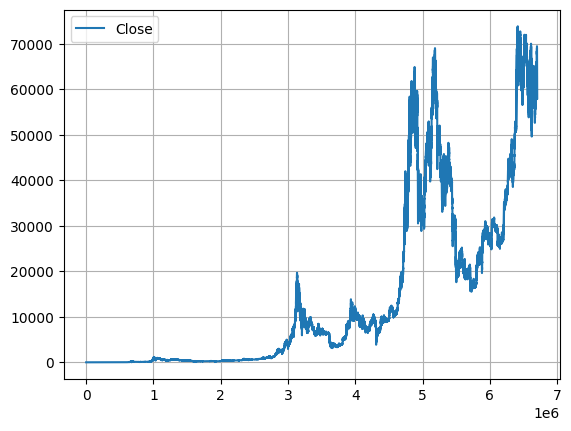

In [ ]:
dataset[['Close']].plot(grid=True)
plt.show()

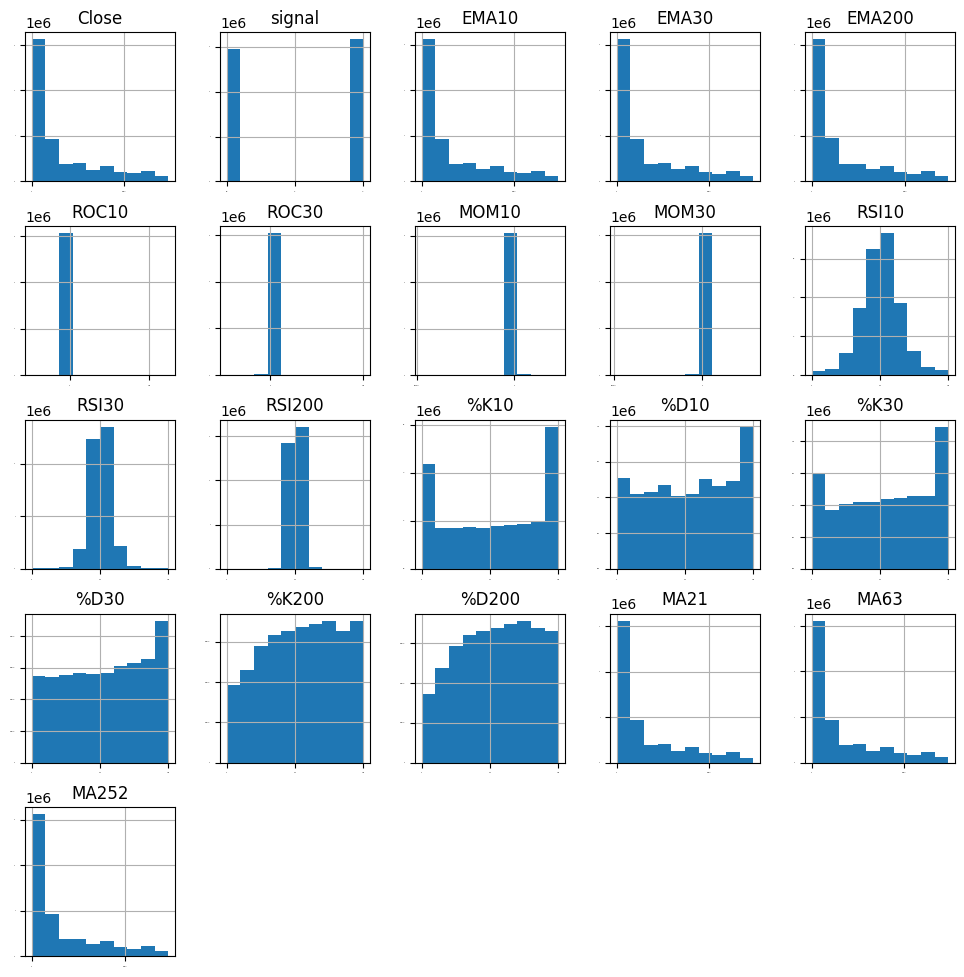

In [ ]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

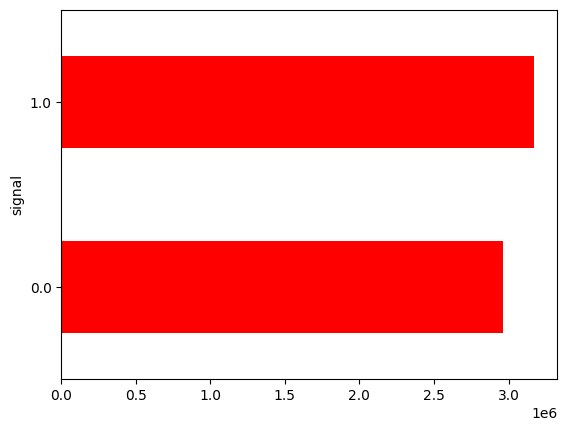

In [ ]:
fig = plt.figure()
plot = dataset.groupby(['signal']).size().plot(kind='barh', color='red')
plt.show()

<Axes: title={'center': 'Correlation Matrix'}>

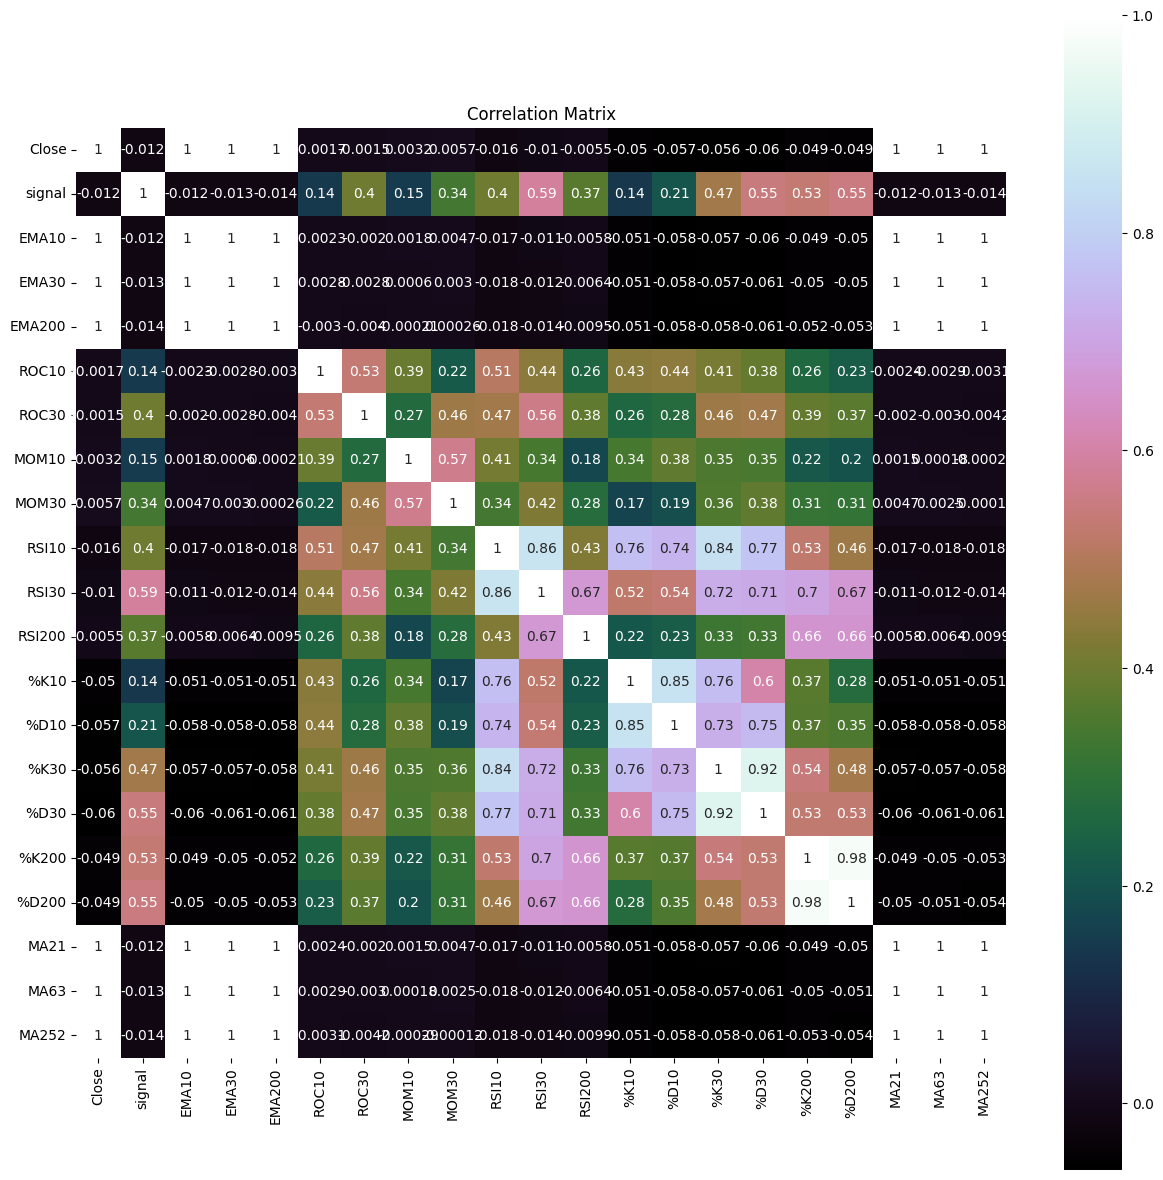

In [ ]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

5. Avaliação de Algoritmos e Modelos
* 5.1. Divisão em Conjuntos de Treinamento e Teste
* Dividimos o conjunto de dados em 80% para treinamento e 20% para teste.

In [ ]:
# split out validation dataset for the end
subset_dataset= dataset.iloc[-100000:]
Y= subset_dataset["signal"]
X = subset_dataset.loc[:, dataset.columns != 'signal']
validation_size = 0.2
seed = 1
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=1)

5.2. Opções de Teste e Métricas de Avaliação

In [ ]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'
#scoring = 'precision'
#scoring = 'recall'
#scoring ='neg_log_loss'
#scoring = 'roc_auc'

5.3. Comparação de Modelos e Algoritmos
Para identificar qual técnica de algoritmo é a melhor para nossa estratégia, avaliamos os seguintes métodos não lineares:


In [ ]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#Neural Network
models.append(('NN', MLPClassifier()))
#Ensable Models
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier(n_jobs=-1)))

K-folds cross validation

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.899687 (0.011089)
LDA: 0.907713 (0.002417)
KNN: 0.934025 (0.002491)
CART: 0.902838 (0.002299)
NB: 0.797688 (0.005149)
NN: 0.817163 (0.083603)
AB: 0.913663 (0.003611)
GBM: 0.923850 (0.002515)
RF: 0.934712 (0.002778)


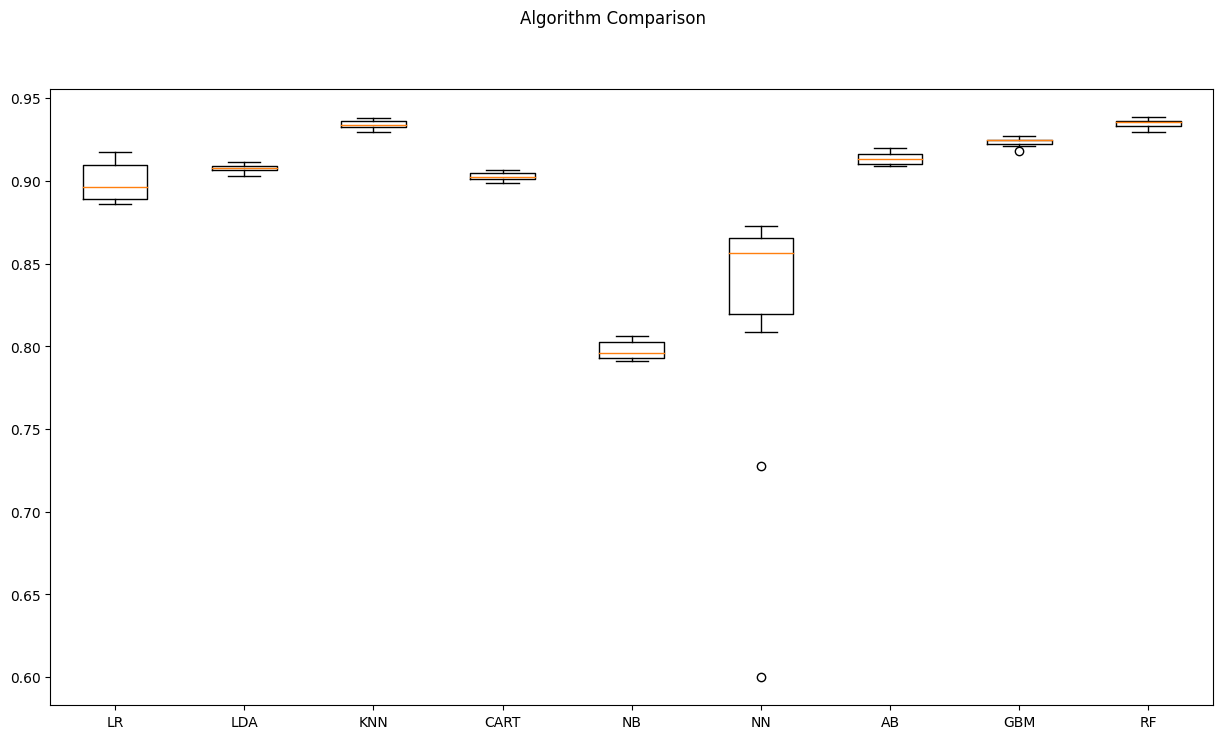

In [ ]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

6. Ajuste do Modelo e Busca em Grade (Grid Search)
O Random Forest foi selecionado para a busca em grade, pois foi um dos melhores modelos entre os testados.

In [ ]:
# Importações necessárias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

# Pré-processamento dos dados
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Definição dos parâmetros para o Grid Search
n_estimators = [20, 80]
max_depth = [5, 10]
criterion = ["gini", "entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion)

# Criação do modelo e do KFold com shuffle ativado
model = RandomForestClassifier(n_jobs=-1)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

# Grid Search com validação cruzada
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# Exibição dos resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']

for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.920375 using {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#7 0.889350 (0.006098) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#5 0.891563 (0.003081) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#3 0.918650 (0.002948) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#1 0.920375 (0.003451) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#8 0.887675 (0.004295) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#6 0.891463 (0.003048) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#4 0.918450 (0.003609) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#2 0.920013 (0.003892) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


7. Finalização do Modelo
Finalização do modelo com os melhores parâmetros encontrados durante a etapa de ajuste.

* 7.1. Resultados no Conjunto de Teste

In [ ]:
# prepare model
model = RandomForestClassifier(criterion='gini', n_estimators=80,max_depth=10,n_jobs=-1) # rbf is default kernel
#model = LogisticRegression()
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=80, n_jobs=-1)

In [ ]:
# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.92205
[[9086  807]
 [ 752 9355]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      9893
         1.0       0.92      0.93      0.92     10107

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



<Axes: xlabel='Predicted', ylabel='Actual'>

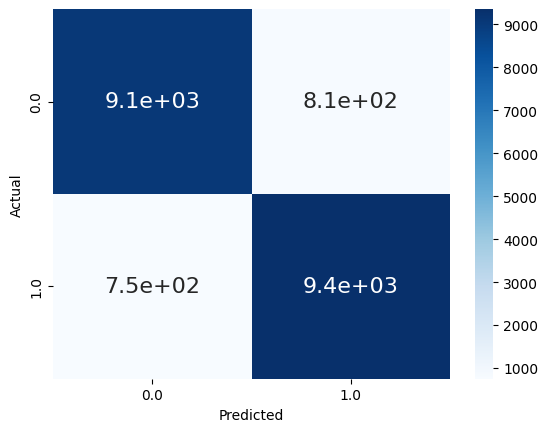

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font sizes

Text(0.5, 0, 'Variable Importance')

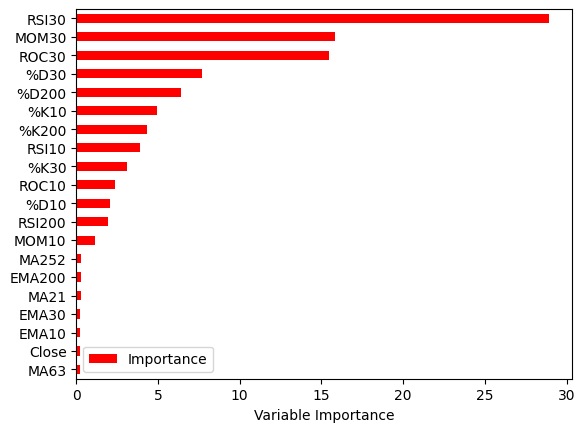

In [ ]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r' )
plt.xlabel('Variable Importance')

<Axes: >

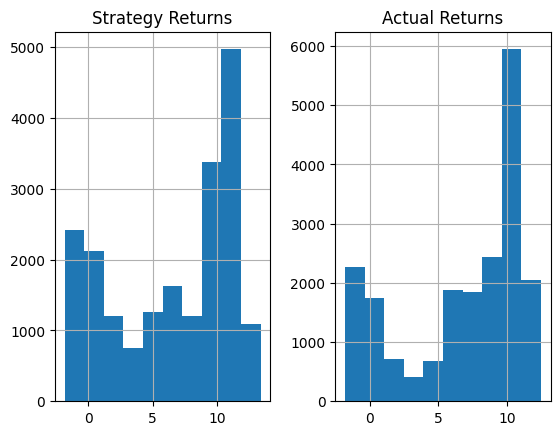

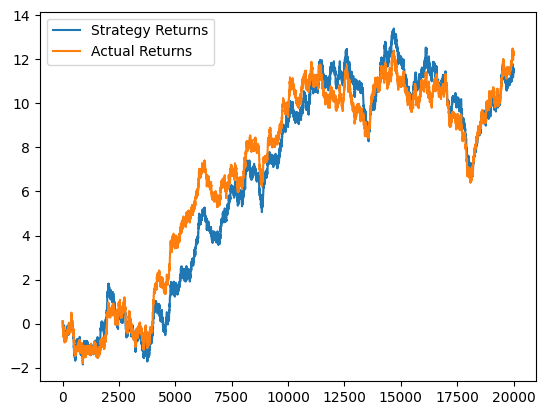

In [ ]:
#Create column for Strategy Returns by multiplying the daily returns by the position that was held at close
#of business the previous day
backtestdata = pd.DataFrame(index=X_validation.index)
#backtestdata = pd.DataFrame()
backtestdata['signal_pred'] = predictions
backtestdata['signal_actual'] = Y_validation
backtestdata['Market Returns'] = X_validation['Close'].pct_change()
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(1)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)
backtestdata=backtestdata.reset_index()
backtestdata.head()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()